In [37]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [38]:
files= np.loadtxt('l2data.txt', dtype='str')
darks = np.loadtxt('darksl2.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatal2 = allimagedata - darksmedia

MemoryError: 

We plot an example one

In [ ]:
plt.imshow(flatteddatal2[0],cmap='gray')
plt.colorbar()

In [ ]:
plt.imshow(allimagedata[0],cmap='gray')

In [ ]:
for i in range(109):
    fits.writeto(files[i]+'processed'+'.fts',flatteddatal2[i],header=fits.open(files[i])[0].header)

# Brillance

We create the median of all the flatted data.

In [ ]:
medianflattedl2 = np.median(flatteddatal2, axis=0)
plt.imshow(medianflattedl2,cmap='gray')

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

In [ ]:
maskl2 = medianflattedl2 < 800 
maskedl2=(np.where(maskl2,1,0))*medianflattedl2
plt.imshow(maskedl2, cmap='gray')

The resulting masked image looks like:

In [ ]:
maskl2 = medianflattedl2 < 900 
maskedl2=(np.where(maskl2,0,1))*medianflattedl2
plt.imshow(maskedl2, cmap='gray')


Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [ ]:
totall2 = np.sum(maskedl2)
print(totall2)

# Brillance Calibration

Above we have found the total luminosity in $Ca \, II$ from the Sun disk. We know that the total luminosity of the Sun in $Ca \, II$ should be 1.036 W/m/nm. With this we can calibrate each pixel.

In [ ]:
call2 = 1.036/totall2
call2=call2 * flatteddatal2

<matplotlib.colorbar.Colorbar instance at 0x7fedaeffce60>

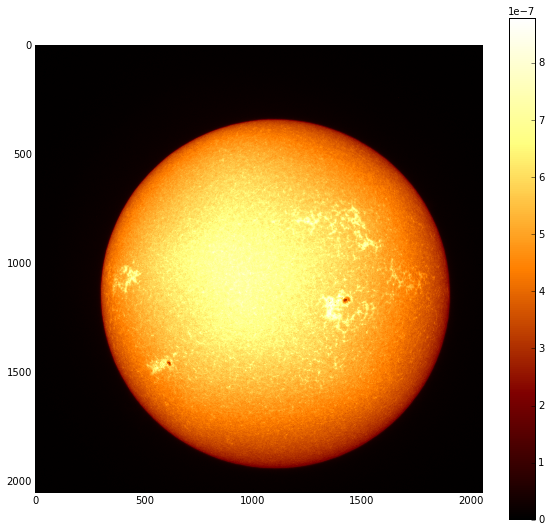

In [42]:
plt.figure(num=None, figsize=(10, 9))
plt.imshow(call2[59],cmap='afmhot')
plt.colorbar()

## Limb Darkening

The first order expression of Limb Darkening is:

$$\frac{I(\phi)}{I(0)}= 1+ A_1 \, (1- \cos(\phi))$$

where $\phi$ represents the angle. 

We can see this in our dataset by plotting the values of the intensity of the Sun for a given x value. We select 900. We use the masked image where everything outside the Sun is 0. We express the index as a function of the angle from -90 to 90 degrees. 

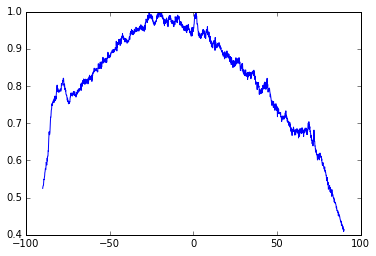

In [40]:
sunmask = maskedl2[900]  != 0
sundiskmaksedl2 = maskedl2[1100][sunmask]
#sundiskmaksedl2 = np.mean([maskedl2[999][sunmask],maskedl2[1000][sunmask], maskedl2[1001][sunmask]],axis=0)
xsundisk = np.linspace(-90, 90, len(sundiskmaksedl2))
plt.plot( xsundisk, sundiskmaksedl2/np.max(sundiskmaksedl2))

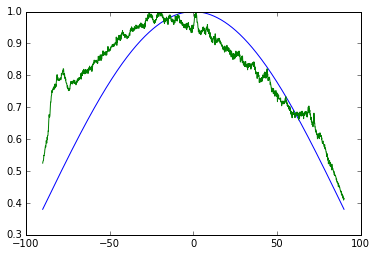

In [41]:
def limb(A, x):
    return (1 +  A*(1 - np.cos(np.deg2rad(x))))
plt.plot( xsundisk, limb(-.62, xsundisk))
plt.plot( xsundisk, sundiskmaksedl2/np.max(sundiskmaksedl2))

We see from the graph above that we can get a good fit of the value $ A = -0.62$